## Least Squares fitting 6
In this section, will now fit polynomials to the data in the files Nonlindata1.csv, Nonlindata2.csv, and Nonlindata3.csv. These files are located in the data folder. I will use two different methods: 
- Linear Least Squares
- Ridge Regression

Both of these models will be trained on the loaded csv data and later tested with the data generated by: 
```
x_test = np.arange(-2,2,.01)
```

### Introduction
In this report I will show the benefits of using regularization. Regularization can reduce overfitting by biaring a solution towards the value 0. I'll show the differences between the Linear Least Squares Model (without regularization) and Ridge Regression (with regularization). Although Ridge Regression is a great algorithm, it still has the limitation of struggling with a large polinomial order. Another downfall of the model is that we are traiding variance for bias which means that we need to make sure to use a proper lambda value.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data1 = np.loadtxt('./data/nonlindata1.csv',delimiter=',')
data2 = np.loadtxt('./data/nonlindata2.csv',delimiter=',')
data3 = np.loadtxt('./data/nonlindata3.csv',delimiter=',')

## Data visualization
Data visualized: Nonlindata1.csv, Nonlindata2.csv, and Nonlindata3.csv

Text(0, 0.5, 'Val2')

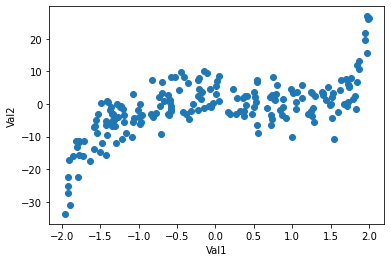

In [3]:
plt.figure()
plt.scatter(data1[:,[0]],data1[:,[1]])
plt.xlabel("Val1")
plt.ylabel("Val2")

Text(0, 0.5, 'Val2')

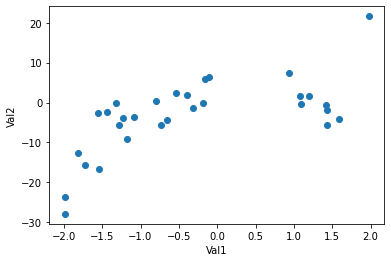

In [4]:
plt.figure()
plt.scatter(data2[:,[0]],data2[:,[1]])
plt.xlabel("Val1")
plt.ylabel("Val2")

Text(0, 0.5, 'Val2')

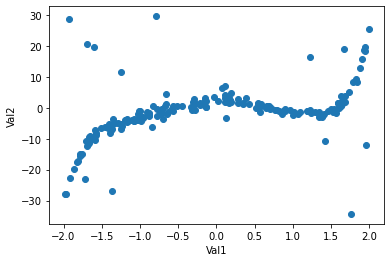

In [5]:
plt.figure()
plt.scatter(data3[:,[0]],data3[:,[1]])
plt.xlabel("Val1")
plt.ylabel("Val2")

## Provided helper function and test data

In [6]:
# provided helper function
def lift(x,n_poly=12):
    N = np.size(x, 0)
    X = np.zeros([N,n_poly+1])
    for p in range(n_poly+1):
        X[:,p]=x**p
    return X

In [7]:
x_test=np.arange(-2,2,.01)

# Linear least squares
In this section I will present my Linear Least Square function and test it with data1, data2, and data3. The data is first fit with the loaded csv file and then tested with the x_test data.



In [8]:
def leastSquaresFit(data):
    x = data[:,0]
    y = data[:,1]
    x = lift(x)
    return np.dot(np.linalg.inv(np.dot(x.T, x) ), np.dot(x.T, y))

## Data 1

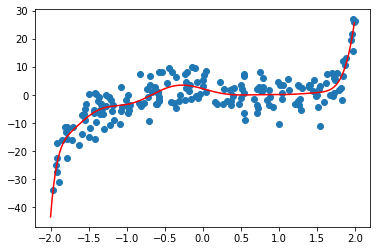

In [9]:
# fit on data 1 and test with x_test
output = np.dot(lift(x_test), leastSquaresFit(data1))
plt.scatter(data1[:,0], data1[:,1])
plt.plot(x_test,output, "r")
plt.show()


## Data 2

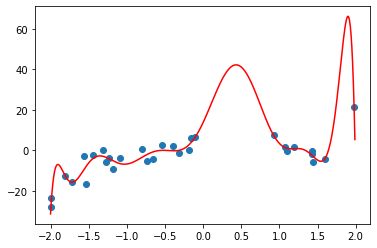

In [10]:
# fit on data 2 and test with x_test
output = np.dot(lift(x_test), leastSquaresFit(data2))
plt.scatter(data2[:,0], data2[:,1])
plt.plot(x_test,output, "r")
plt.show()


## Data 3

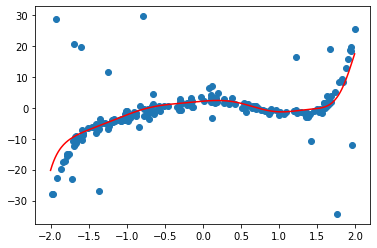

In [11]:
# fit on data 3 and test with x_test
output = np.dot(lift(x_test), leastSquaresFit(data3))
plt.scatter(data3[:,0], data3[:,1])
plt.plot(x_test,output, "r")
plt.show()


# Ridge Regression
In this section I will present my Ridge Regression function and test it with data1, data2, and data3. The data is first fit with the loaded csv file and then tested with the x_test data and with different values for lambda.


In [12]:
def ridgeFit(data,lamb):
    x = data[:,0]
    y = data[:,1]
    x = lift(x)
    al = lamb * np.eye(x.shape[1])
    al[0, 0] = 0
    return np.dot(np.linalg.inv(np.dot(x.T, x) + np.dot(al.T, al)), np.dot(x.T, y))

## Data 1
Here I test different values of lambda after fitting ridge regression to data 1 and testing on x_test

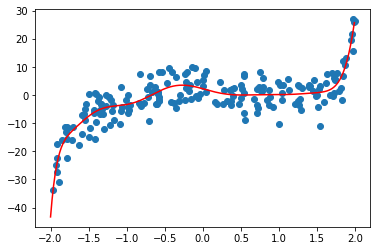

In [13]:
# fit on data 1 and test with x_test and lambda = 0.01
output = np.dot(lift(x_test), ridgeFit(data1,0.01))
plt.scatter(data1[:,0], data1[:,1])
plt.plot(x_test,output, "r")
plt.show()

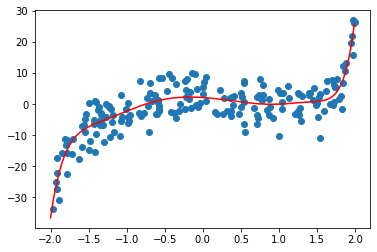

In [14]:
# fit on data 1 and test with x_test and lambda = 1
output = np.dot(lift(x_test), ridgeFit(data1,1))
plt.scatter(data1[:,0], data1[:,1])
plt.plot(x_test,output, "r")
plt.show()

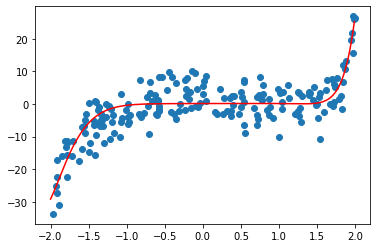

In [15]:
# fit on data 1 and test with x_test and lambda = 50
output = np.dot(lift(x_test), ridgeFit(data1,50))
plt.scatter(data1[:,0], data1[:,1])
plt.plot(x_test,output, "r")
plt.show()

## Data 2
Here I test different values of lambda after fitting ridge regression to data 2 and testing on x_test

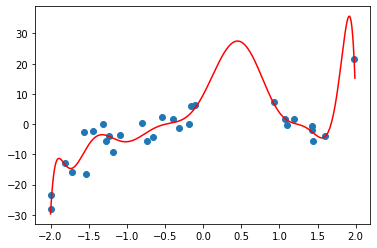

In [16]:
# fit on data 2 and test with x_test and lambda = 0.01
output = np.dot(lift(x_test), ridgeFit(data2,0.01))
plt.scatter(data2[:,0], data2[:,1])
plt.plot(x_test,output, "r")
plt.show()

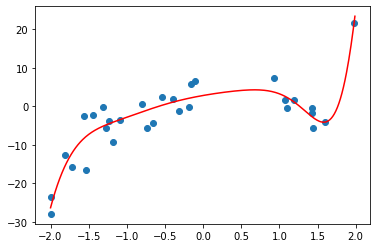

In [17]:
# fit on data 2 and test with x_test and lambda = 1
output = np.dot(lift(x_test), ridgeFit(data2,1))
plt.scatter(data2[:,0], data2[:,1])
plt.plot(x_test,output, "r")
plt.show()

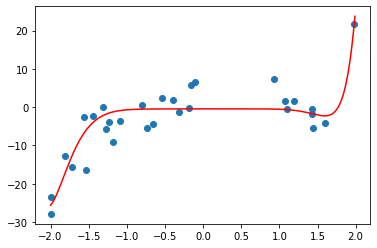

In [18]:
# fit on data 2 and test with x_test and lambda = 50
output = np.dot(lift(x_test), ridgeFit(data2,50))
plt.scatter(data2[:,0], data2[:,1])
plt.plot(x_test,output, "r")
plt.show()

## Data 3
Here I test different values of lambda after fitting ridge regression to data 3 and testing on x_test

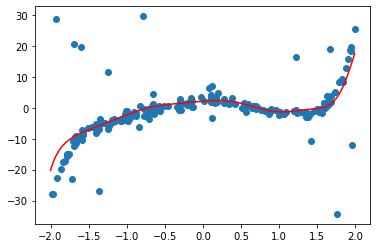

In [19]:
# fit on data 3 and test with x_test and lambda = 0.01
output = np.dot(lift(x_test), ridgeFit(data3,0.01))
plt.scatter(data3[:,0], data3[:,1])
plt.plot(x_test,output, "r")
plt.show()

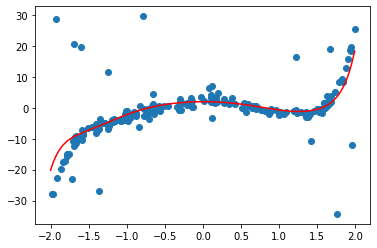

In [20]:
# fit on data 3 and test with x_test and lambda = 1
output = np.dot(lift(x_test), ridgeFit(data3,1))
plt.scatter(data3[:,0], data3[:,1])
plt.plot(x_test,output, "r")
plt.show()

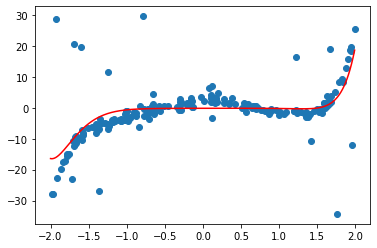

In [21]:
# fit on data 3 and test with x_test and lambda = 50
output = np.dot(lift(x_test), ridgeFit(data3,50))
plt.scatter(data3[:,0], data3[:,1])
plt.plot(x_test,output, "r")
plt.show()

# EXTRA CREDIT
sklearn’s  Huber  robust  regressor  model

Why and How it works:
Huber is a linear regression model that is robust to outliers. The fact that this model is a linear regression model means that we can use it the same way as we have used the previously implemented models in this report. From the graphs we can see that it manages to fit the data1 dataset relatively well. This model has a parameter called sigma that can help us controll how influenced the model is going to be by outliers.


In [22]:
from sklearn.linear_model import HuberRegressor

## Data 1

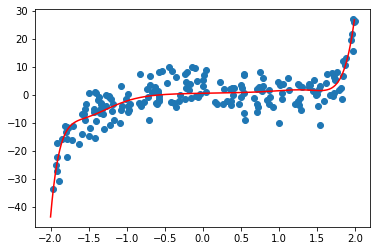

In [23]:
x = data1[:,0]
y = data1[:,1]
x = lift(x)
huber = HuberRegressor().fit(x,y)
output = huber.predict(lift(x_test))
plt.scatter(data1[:,0], data1[:,1])
plt.plot(x_test,output, "r")
plt.show()

## Data 2

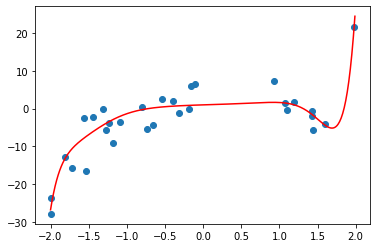

In [24]:
x = data2[:,0]
y = data2[:,1]
x = lift(x)
huber = HuberRegressor().fit(x,y)
output = huber.predict(lift(x_test))
plt.scatter(data2[:,0], data2[:,1])
plt.plot(x_test,output, "r")
plt.show()

## Data 3

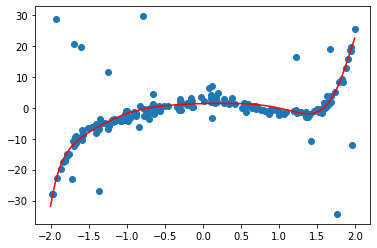

In [25]:
x = data3[:,0]
y = data3[:,1]
x = lift(x)
huber = HuberRegressor().fit(x,y)
output = huber.predict(lift(x_test))
plt.scatter(data3[:,0], data3[:,1])
plt.plot(x_test,output, "r")
plt.show()